In [1]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../../scripts/")
import matplotlib.pyplot as plt
import numpy as np

from WH_prediction import *

In [2]:
evo_rates = {"pol": {"consensus": {"first": 1.98e-6, "second": 1.18e-6, "third": 5.96e-6},
                     "non_consensus": {"first": 2.88e-5, "second": 4.549e-5, "third": 2.06e-5}}}
equilibrium_frequency = {"pol": {"first": 0.952, "second": 0.975, "third": 0.860}}

colors = ["C0","C1","C2"]
regions = ["pol"]
fontsize = 16
figsize = (14, 10)

# Hamming distance to intial sequence

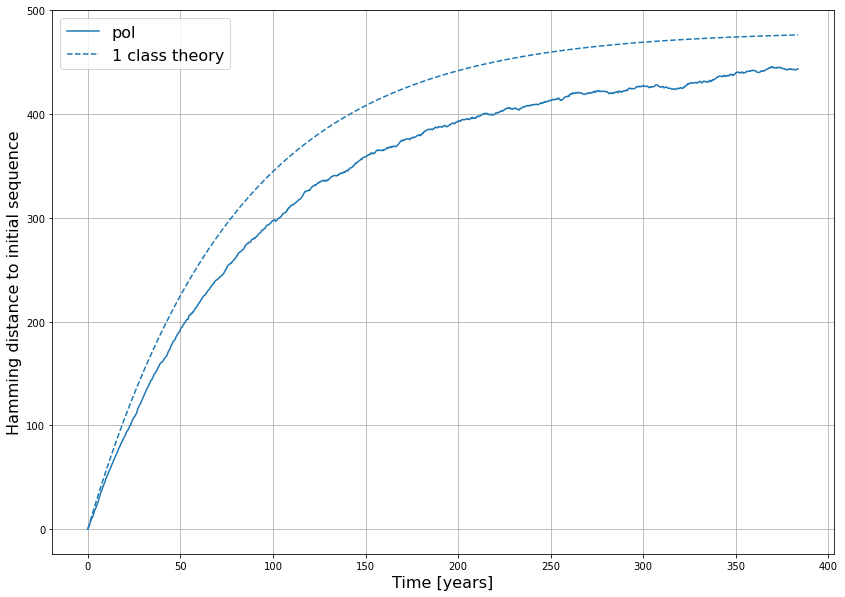

In [5]:
nb_simulation = 10
simulation_time = 140000  # in days
dt = 10
time = np.arange(0, simulation_time+1, dt)
sampling_time = 10 * dt
sequence_length = 3000


plt.figure(figsize=figsize)
for ii, region in enumerate(regions):
    # True is consensus, False is non consensus
    x_0 = initialize_fixed_point(sequence_length, equilibrium_frequency[region])
    sequences = run_simulation_group(x_0, simulation_time, dt, evo_rates[region], sampling_time, nb_simulation)
    
    distance_initial = distance_to_initial(sequences)
    mean_distance_initial = np.mean(distance_initial, axis=-1)
    
    rate_rev = 1/3*(evo_rates["pol"]["non_consensus"]["first"]+evo_rates["pol"]["non_consensus"]["second"]+evo_rates["pol"]["non_consensus"]["third"])
    rate_non_rev = 1/3*(evo_rates["pol"]["consensus"]["first"]+evo_rates["pol"]["consensus"]["second"]+evo_rates["pol"]["consensus"]["third"])

    x = time[::10] / 365
    saturation = 2 * rate_rev * rate_non_rev * len(x_0) / (rate_rev + rate_non_rev)**2
    tau = 1 / (rate_rev + rate_non_rev)
    theory = saturation * (1 - np.exp(-time / tau))

    plt.plot(x, mean_distance_initial, label=f"{region}", color=colors[ii])
    plt.plot(time / 365, theory, '--', color=colors[ii], label="1 class theory")
    
plt.xlabel("Time [years]", fontsize=fontsize)
plt.ylabel("Hamming distance to initial sequence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()


# Same plot in log-log

<ipython-input-6-40a1cdaaf9ba>:29: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 400])


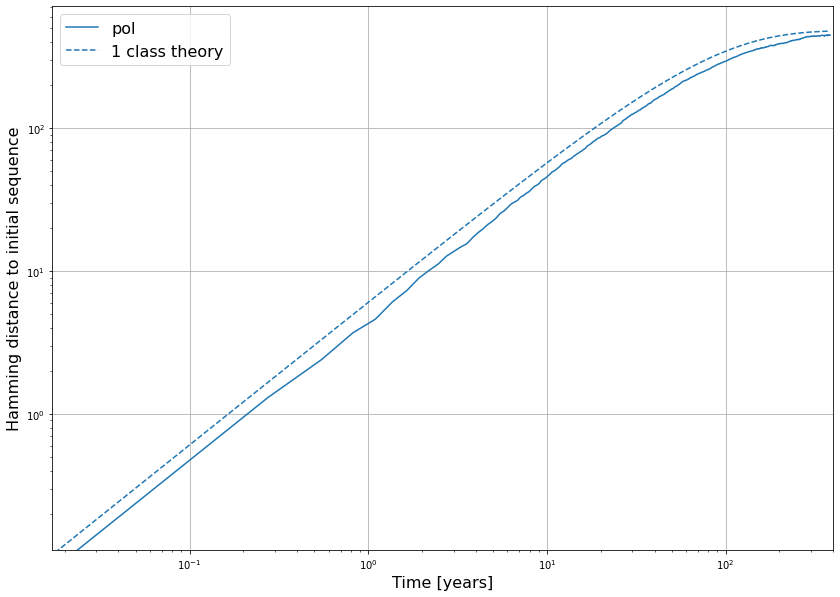

In [6]:
# Exponential behaviour as expected


plt.figure(figsize=figsize)
for ii, region in enumerate(regions):
    # True is consensus, False is non consensus
    x_0 = initialize_fixed_point(sequence_length, equilibrium_frequency[region])
    sequences = run_simulation_group(x_0, simulation_time, dt, evo_rates[region], sampling_time, nb_simulation)
    
    distance_initial = distance_to_initial(sequences)
    mean_distance_initial = np.mean(distance_initial, axis=-1)
    
    rate_rev = 1/3*(evo_rates["pol"]["non_consensus"]["first"]+evo_rates["pol"]["non_consensus"]["second"]+evo_rates["pol"]["non_consensus"]["third"])
    rate_non_rev = 1/3*(evo_rates["pol"]["consensus"]["first"]+evo_rates["pol"]["consensus"]["second"]+evo_rates["pol"]["consensus"]["third"])

    x = time[::10] / 365
    saturation = 2 * rate_rev * rate_non_rev * len(x_0) / (rate_rev + rate_non_rev)**2
    tau = 1 / (rate_rev + rate_non_rev)
    theory = saturation * (1 - np.exp(-time / tau))

    plt.plot(x, mean_distance_initial, label=f"{region}", color=colors[ii])
    plt.plot(time / 365, theory, '--', color=colors[ii], label="1 class theory")
    
plt.xlabel("Time [years]", fontsize=fontsize)
plt.ylabel("Hamming distance to initial sequence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xscale("log")
plt.yscale("log")
plt.xlim([0, 400])
plt.grid()
plt.show()


# Distance to pairs (at the same timepoint)

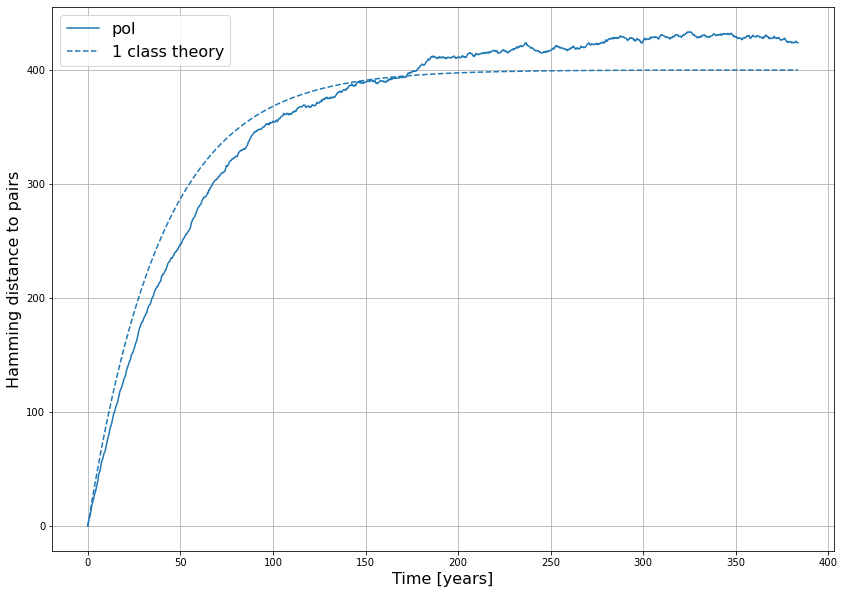

In [10]:
nb_simulation = 10
simulation_time = 140000  # in days
dt = 10
time = np.arange(0, simulation_time+1, dt)
sampling_time = 10 * dt
sequence_length = 2500


plt.figure(figsize=figsize)
for ii, region in enumerate(regions):
    x_0 = initialize_fixed_point(sequence_length, equilibrium_frequency[region])
    sequences = run_simulation_group(x_0, simulation_time, dt, evo_rates[region], sampling_time, nb_simulation)

    rate_rev = 1/3*(evo_rates["pol"]["non_consensus"]["first"]+evo_rates["pol"]["non_consensus"]["second"]+evo_rates["pol"]["non_consensus"]["third"])
    rate_non_rev = 1/3*(evo_rates["pol"]["consensus"]["first"]+evo_rates["pol"]["consensus"]["second"]+evo_rates["pol"]["consensus"]["third"])

    distance_pairs = distance_to_pairs(sequences)
    mean_distance_pairs = np.mean(distance_pairs, axis=-1)

    x = time[::10] / 365
    saturation = 2 * rate_rev * rate_non_rev * len(x_0) / (rate_rev + rate_non_rev)**2
    tau = 1 / (2*(rate_rev + rate_non_rev))
    theory = saturation * (1 - np.exp(-time / tau))

    plt.plot(x, mean_distance_pairs, label=f"{region}", color=colors[ii])
    plt.plot(time / 365, theory, '--', color=colors[ii], label="1 class theory")
    
plt.xlabel("Time [years]", fontsize=fontsize)
plt.ylabel("Hamming distance to pairs", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()


# Distance to consensus

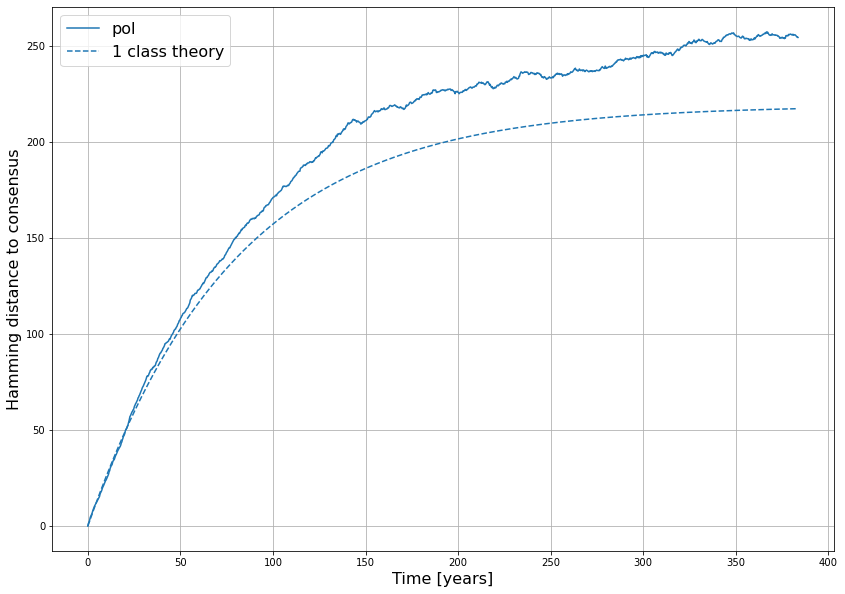

In [12]:
nb_simulation = 10
simulation_time = 140000  # in days
dt = 10
time = np.arange(0, simulation_time+1, dt)
sampling_time = 10 * dt
sequence_length = 2500


plt.figure(figsize=figsize)
for ii, region in enumerate(regions):
    # True is consensus, False is non consensus
    x_0 = np.ones(sequence_length, dtype=bool)
    sequences = run_simulation_group(x_0, simulation_time, dt, evo_rates[region], sampling_time, nb_simulation)
    
    distance_initial = distance_to_initial(sequences)
    mean_distance_initial = np.mean(distance_initial, axis=-1)
    
    rate_rev = 1/3*(evo_rates["pol"]["non_consensus"]["first"]+evo_rates["pol"]["non_consensus"]["second"]+evo_rates["pol"]["non_consensus"]["third"])
    rate_non_rev = 1/3*(evo_rates["pol"]["consensus"]["first"]+evo_rates["pol"]["consensus"]["second"]+evo_rates["pol"]["consensus"]["third"])

    x = time[::10] / 365
    saturation = rate_non_rev*len(x_0) / (rate_rev + rate_non_rev)
    tau = 1 / (rate_rev + rate_non_rev)
    theory = saturation * (1 - np.exp(-time / tau))

    plt.plot(x, mean_distance_initial, label=f"{region}", color=colors[ii])
    plt.plot(time / 365, theory, '--', color=colors[ii], label="1 class theory")
    
plt.xlabel("Time [years]", fontsize=fontsize)
plt.ylabel("Hamming distance to consensus", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()
